<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/Neural-Net-Regression/blob/main/02_NN_Regression_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.18.0


# Get Insurance Dataset

In [91]:
# read in the insurane dataset
insurance=pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
print(insurance.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [92]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [93]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [94]:
insurance['children'].unique()

array([0, 1, 3, 2, 5, 4])

# One hot encoding our dataframe

In [95]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [96]:
insurance_one_hot["sex_female"].dtype

dtype('bool')

In [97]:
insurance_one_hot["age"]

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [98]:
# split dataset
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]


In [99]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [100]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


# create training and testing sets by sklern

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [102]:
import tensorflow as tf
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])
model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

model_1_history=model_1.fit(X_train,y_train,epochs=100,verbose=0)

In [103]:
model_1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133 (536.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [104]:
y_pred=model_1.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Lets evaluate our model

In [105]:
model_1_loss,model_1_mae=model_1.evaluate(X_test,y_test)
model_1_loss,model_1_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7977.9062 - mae: 7977.9062


(7941.169921875, 7941.169921875)

# Improving our model

In [106]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
model_2_history=model_2.fit(X_train,y_train,epochs=100,verbose=0)


In [107]:
model_2_loss,model_2_mae=model_2.evaluate(X_test,y_test)
model_2_loss,model_2_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4841.6040 - mae: 4841.6040


(4706.28662109375, 4706.28662109375)

#Losss curve or training curve

Text(0.5, 0, 'epochs')

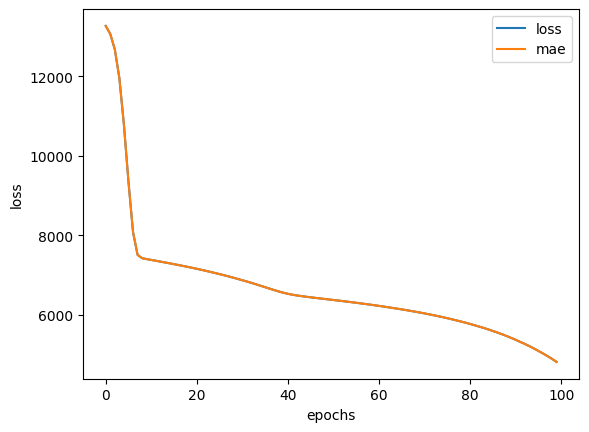

In [108]:
pd.DataFrame(model_2_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> So How long do we train for? for this, tensorflow has a solution. i.e. EarlyStoppingCallback which is a tensorflow component which can be add in our model to stop training when our model stop improving after certain metric.

# Preprocessing data: Normalization and standardisation
in terms of scaling values NN prefers normalization
To prepare out data. we can burrow a few classes from sikit-learn


<Axes: ylabel='Frequency'>

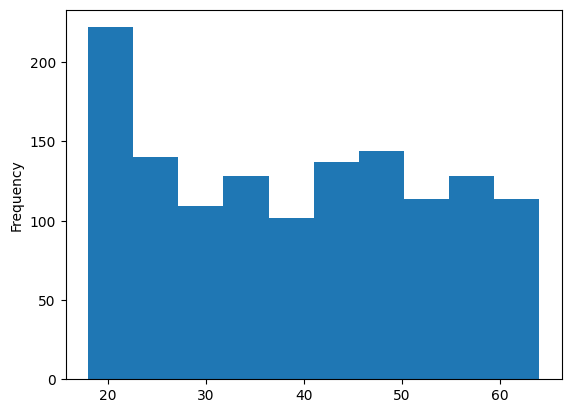

In [109]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

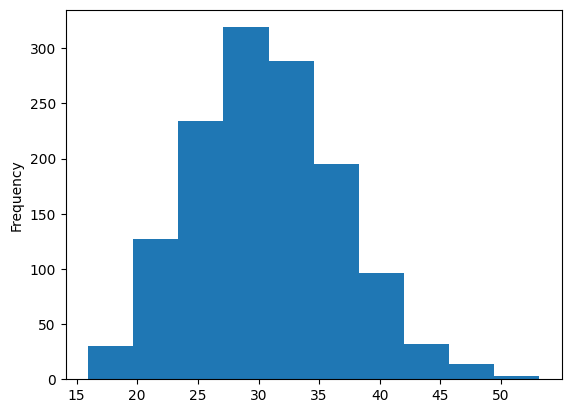

In [110]:
X["bmi"].plot(kind="hist")

# ColumnTransformer
When creating a ColumnTransformer, its components should be passed as a list of tuples inside the constructor. Each tuple contains:

A name for the transformer (e.g., "scaler" or "onehot").

The transformer object (e.g., MinMaxScaler() or OneHotEncoder()).

The column names to which the transformer should be applied.

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Creating a column transformer
ct = ColumnTransformer(
    transformers=[
        ("scaler", MinMaxScaler(), ["age", "bmi", "children"]),  # Scale these columns
        ("onehot", OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])  # One-hot encode these columns
    ]
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer on training data
ct.fit(X_train)

# Transform the training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


## Save the fitted ColumnTransformer

In [112]:
import pickle
with open("column_transformer.pkl", "wb") as f:
    pickle.dump(ct, f)

In [113]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [114]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [115]:
X_train.shape,X_train_normal.shape # columns are added by one hot encoder

((1070, 6), (1070, 11))

Our data is normalized and one hot encoded. lets build our neural network based on this data

In [116]:
tf.random.set_seed(42)
model_3_normalized=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3_normalized.compile(loss=tf.keras.losses.mae,
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=["mae"])
model_3_history=model_3_normalized.fit(X_train_normal,y_train,epochs=200,verbose=0)

Text(0.5, 0, 'epochs')

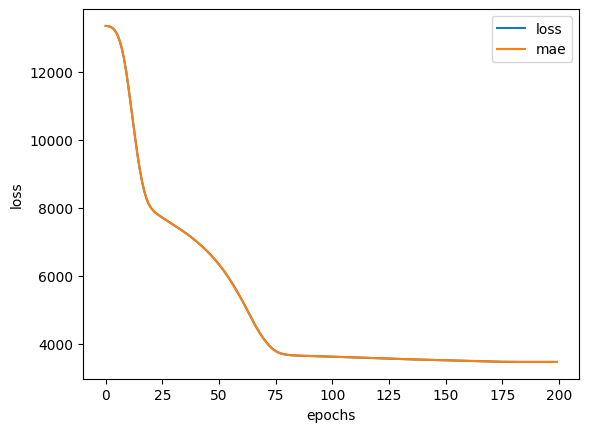

In [117]:
pd.DataFrame(model_3_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [118]:
model_3_loss,model_3_mae=model_3_normalized.evaluate(X_test_normal,y_test)
model_3_loss,model_3_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3213.3772 - mae: 3213.3772


(3160.814697265625, 3160.814697265625)

## Model 2 vs Model 3

In [119]:
model_2_mae,model_3_mae

(4706.28662109375, 3160.814697265625)

## Testing sample test data

In [120]:
sample_data = X_test_normal[0].reshape(1, -1)  # -1 infers the size (11)
prediction = model_3_normalized.predict(sample_data)
print("Prediction for the first test sample:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Prediction for the first test sample: 9346.834


In [121]:
model2_pred=model_2.predict(sample_data)
model2_pred[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


np.float32(-4000.3464)

## Saving and loading model

In [122]:
model_3_normalized.save("insurance_model.h5")

In [123]:
insurance_model_normalized_loaded=tf.keras.models.load_model("insurance_model.h5")
insurance_model_normalized_loaded.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,223 (8.69 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [124]:
loaded_model_prediction=insurance_model_normalized_loaded.predict(sample_data)
loaded_model_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


array([[9346.834]], dtype=float32)

In [125]:
model_3_normalized.predict(sample_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[9346.834]], dtype=float32)

In [126]:
model_3_normalized.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

# Predicting user Input

In [150]:
import pandas as pd
# age	sex	bmi	children	smoker	region
age=int(input("enter age: "))
sex=input("enter sex: ")
bmi=float(input("enter bmi: "))
children=int(input("enter children: "))
smoker=input("enter smoker: ")
region=input("enter region: ")
input_df=pd.DataFrame([[age,sex,bmi,children,smoker,region]],columns=["age","sex","bmi","children","smoker","region"])
input_df

enter age: 33
enter sex: male
enter bmi: 22.7
enter children: 0
enter smoker: no
enter region: northwest


,age,sex,bmi,children,smoker,region
0,33,male,22.7,0,no,northwest


In [141]:
X_test.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object


In [142]:
input_df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object


## Load column transformer and transform user input

In [151]:
import pickle
with open("column_transformer.pkl","rb") as f:
  ct=pickle.load(f)
user_data_norm = ct.transform(input_df)

In [148]:
user_data_norm

array([[0.        , 0.47726661, 0.2       , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ]])

In [152]:
model_normalized_pred=model_3_normalized.predict(user_data_norm)
float(model_normalized_pred[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


4406.12451171875